# Exploratory Data Analysis

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd

# load the dataset
df = pd.read_csv('/content/gdrive/My Drive/Datasets/AllProjectIssuesSpentTime.csv')
df.head(10)

,Priority,Status,Created,Resolution,Updated,Time Spent,Σ Time Spent,Issue Category and Classification,Status Category Changed,[CHART] Date of First Response,Σ Hours Spent for Issues,Σ Days Spent for Issues,Estimated Time Hours,Estimated Time Days,Estimated Hours,Satisfaction,Project Name
0,Medium,Open,9/10/2021 14:36,NaN,9/10/2021 14:36,NaN,NaN,NaN,9/10/2021 14:36,NaN,0.0,0.0,6.0,0.75,6.0,Satsfied,UIMA
1,Medium,Open,9/10/2021 14:17,NaN,9/10/2021 14:17,NaN,NaN,NaN,9/10/2021 14:17,NaN,0.0,0.0,6.0,0.75,6.0,Satsfied,UIMA
2,Medium,Open,9/10/2021 13:57,NaN,9/10/2021 14:02,NaN,NaN,NaN,9/10/2021 13:57,NaN,0.0,0.0,6.0,0.75,6.0,Satsfied,UIMA
3,Medium,Open,9/10/2021 13:51,NaN,9/10/2021 14:03,NaN,NaN,NaN,9/10/2021 13:51,NaN,0.0,0.0,6.0,0.75,6.0,Satsfied,UIMA
4,Medium,Open,9/10/2021 13:49,NaN,9/10/2021 14:04,NaN,NaN,NaN,9/10/2021 13:49,NaN,0.0,0.0,6.0,0.75,6.0,Satsfied,UIMA
5,Medium,Open,9/10/2021 13:26,NaN,9/10/2021 13:26,NaN,NaN,NaN,9/10/2021 13:26,NaN,0.0,0.0,6.0,0.75,6.0,Satsfied,Beam
6,Medium,Open,9/10/2021 13:24,NaN,9/10/2021 13:26,NaN,NaN,NaN,9/10/2021 13:24,NaN,0.0,0.0,6.0,0.75,6.0,Satsfied,Mesos
7,Critical,Open,9/10/2021 10:58,NaN,9/10/2021 10:58,NaN,NaN,NaN,9/10/2021 10:58,NaN,0.0,0.0,4.0,0.50,4.0,Satsfied,Beam
8,Low,Open,9/10/2021 10:53,NaN,9/10/2021 11:41,NaN,NaN,NaN,9/10/2021 10:53,NaN,0.0,0.0,8.0,1.00,8.0,Satsfied,Mesos
9,Medium,Open,9/10/2021 10:18,NaN,9/10/2021 10:18,NaN,NaN,NaN,9/10/2021 10:18,NaN,0.0,0.0,6.0,0.75,6.0,Satsfied,UIMA


In [4]:
# list columns
df.columns

Index(['Priority', 'Status', 'Created', 'Resolution', 'Updated', 'Time Spent',
       'Σ Time Spent', 'Issue Category and Classification',
       'Status Category Changed', '[CHART] Date of First Response',
       'Σ Hours Spent for Issues', 'Σ Days Spent for Issues',
       'Estimated Time Hours', 'Estimated Time Days', 'Estimated Hours',
       'Satisfaction', 'Project Name'],
      dtype='object')

In [5]:
# removed identical columns and non-required columns

df.drop(['Updated','Time Spent','Σ Hours Spent for Issues', 'Σ Days Spent for Issues','Status Category Changed','Estimated Time Hours', 'Estimated Time Days'],axis=1,inplace=True)

In [6]:
df.head()

,Priority,Status,Created,Resolution,Σ Time Spent,Issue Category and Classification,[CHART] Date of First Response,Estimated Hours,Satisfaction,Project Name
0,Medium,Open,9/10/2021 14:36,NaN,NaN,NaN,NaN,6.0,Satsfied,UIMA
1,Medium,Open,9/10/2021 14:17,NaN,NaN,NaN,NaN,6.0,Satsfied,UIMA
2,Medium,Open,9/10/2021 13:57,NaN,NaN,NaN,NaN,6.0,Satsfied,UIMA
3,Medium,Open,9/10/2021 13:51,NaN,NaN,NaN,NaN,6.0,Satsfied,UIMA
4,Medium,Open,9/10/2021 13:49,NaN,NaN,NaN,NaN,6.0,Satsfied,UIMA


In [7]:
# rename columns
df.columns = ['Priority',	'Status', 'Created Date',	'Resolution', 'Total Time Spent', 'Issue Category and Classification',	'Date of First Response',	'Estimated SLA in Hours','Client Satisfaction',	'Project Name']

In [8]:
# check for null values distribution
df.isnull().sum()

Priority                                 0
Status                                   0
Created Date                             0
Resolution                            2013
Total Time Spent                     10915
Issue Category and Classification    28220
Date of First Response                6252
Estimated SLA in Hours                  44
Client Satisfaction                     44
Project Name                            13
dtype: int64

In [9]:
# dataset shape
df.shape

(31944, 10)

In [10]:
# remove data points if null values contains in following columns
# 1. Project Name
# 2. Satisfaction
# 3. Estimated Hours
# 4. Date of First Response

df.dropna(subset=['Estimated SLA in Hours','Client Satisfaction','Project Name','Date of First Response'], inplace=True)

# check for null values distribution
df.isnull().sum()

Priority                                 0
Status                                   0
Created Date                             0
Resolution                             579
Total Time Spent                      8689
Issue Category and Classification    22273
Date of First Response                   0
Estimated SLA in Hours                   0
Client Satisfaction                      0
Project Name                             0
dtype: int64

In [11]:
# dataset shape
df.shape

(25677, 10)

In [12]:
# unique values in Resolution
df['Resolution'].unique()

array(['Fixed', nan, 'Await Client Feedback', 'Invalid', 'Responded',
       'Duplicate', 'Await 3rd Party Feedback', 'Later', 'Done',
       'Cannot Reproduce', 'Works for Me', "Won't Fix", "Won't Do",
       'Incomplete'], dtype=object)

In [13]:
# unique values in Priority
df['Priority'].unique()

array(['Medium', 'Critical', 'Blocker', 'Low'], dtype=object)

In [14]:
# unique values in Status
df['Status'].unique()

array(['Resolved', 'Verified', 'In Progress', 'Open', 'On Hold', 'Closed',
       'Reopened'], dtype=object)

In [15]:
# unique values in Issue Category and Classification
df['Issue Category and Classification'].unique()

array([nan, 'Defect - Incorrect design', 'Invalid - Not an error',
       'Defect - Coding error', 'Defect - Omitted Requirement',
       'Explanation - Not a defect', 'Setup_Issue - Data setup', 'Defect',
       'Setup_Issue', 'Enhancement - Enhancement', 'Invalid',
       'Explanation', 'Setup_Issue - Config error',
       'Data_Correction - Not an error', 'Enhancement',
       'Explanation - Unable to Re-create',
       'Explanation - Lack of understanding',
       'Connectivity_Issue - Third party Issue',
       'Enhancement - Report request', 'Defect - Performance Issue',
       'Data_Correction', 'Explanation - Incorrect workflow',
       'Connectivity_Issue', 'Explanation - Incomplete',
       'Defect - Misunderstood requirement',
       'Connectivity_Issue - Infrastructure Issue',
       'Defect - Misunderstood design', 'Defect - Incorrect Requirement'],
      dtype=object)

### Replace NaN with 'N/A' to take NaN as another category
### This would be applied for the following features
### 1. Resolution
### 2. Issue Category and Classification

In [16]:
df['Issue Category and Classification'].fillna('N/A', inplace=True)
df['Resolution'].fillna('N/A', inplace=True)

In [ ]:
df.head()

,Priority,Status,Created Date,Resolution,Total Time Spent,Issue Category and Classification,Date of First Response,Estimated SLA in Hours,Client Satisfaction,Project Name
10,Medium,Resolved,9/10/2021 8:25,Fixed,NaN,N/A,9/10/2021 9:13,6.0,Satsfied,Apache Cordova
11,Critical,Verified,9/10/2021 7:07,Fixed,7200.0,Defect - Incorrect design,9/10/2021 11:23,4.0,Satsfied,Mesos
12,Critical,In Progress,9/10/2021 5:14,N/A,NaN,N/A,9/10/2021 6:37,4.0,Satsfied,Mesos
13,Medium,Open,9/10/2021 5:06,N/A,NaN,N/A,9/10/2021 5:13,6.0,Satsfied,Beam
14,Critical,Open,9/10/2021 3:20,N/A,14400.0,N/A,9/10/2021 4:04,4.0,Not Satisfied,Mesos


In [17]:
# check for null values distribution
df.isnull().sum()

Priority                                0
Status                                  0
Created Date                            0
Resolution                              0
Total Time Spent                     8689
Issue Category and Classification       0
Date of First Response                  0
Estimated SLA in Hours                  0
Client Satisfaction                     0
Project Name                            0
dtype: int64

In [18]:
df.reset_index(inplace=True,drop=True)

In [19]:
df.head()

,Priority,Status,Created Date,Resolution,Total Time Spent,Issue Category and Classification,Date of First Response,Estimated SLA in Hours,Client Satisfaction,Project Name
0,Medium,Resolved,9/10/2021 8:25,Fixed,NaN,N/A,9/10/2021 9:13,6.0,Satsfied,Apache Cordova
1,Critical,Verified,9/10/2021 7:07,Fixed,7200.0,Defect - Incorrect design,9/10/2021 11:23,4.0,Satsfied,Mesos
2,Critical,In Progress,9/10/2021 5:14,N/A,NaN,N/A,9/10/2021 6:37,4.0,Satsfied,Mesos
3,Medium,Open,9/10/2021 5:06,N/A,NaN,N/A,9/10/2021 5:13,6.0,Satsfied,Beam
4,Critical,Open,9/10/2021 3:20,N/A,14400.0,N/A,9/10/2021 4:04,4.0,Not Satisfied,Mesos


In [20]:
df.shape

(25677, 10)

#### Total Time Spent feature has null values. And it means not yet completed the task.
#### So, in here i break down the dataset into two (2) subsets.
#### 1. df_1 - which have time spent
#### 2. df_2 - which haven't time spent

In [21]:
# dataframe time spent is null
df_time_spent_null = df[df['Total Time Spent'].isnull()]
df_time_spent_null.drop('Total Time Spent',axis=1,inplace=True)
df_time_spent_null.reset_index(inplace=True,drop=True)
df_time_spent_null.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Priority,Status,Created Date,Resolution,Issue Category and Classification,Date of First Response,Estimated SLA in Hours,Client Satisfaction,Project Name
0,Medium,Resolved,9/10/2021 8:25,Fixed,N/A,9/10/2021 9:13,6.0,Satsfied,Apache Cordova
1,Critical,In Progress,9/10/2021 5:14,N/A,N/A,9/10/2021 6:37,4.0,Satsfied,Mesos
2,Medium,Open,9/10/2021 5:06,N/A,N/A,9/10/2021 5:13,6.0,Satsfied,Beam
3,Critical,On Hold,9/10/2021 0:27,Await Client Feedback,N/A,9/10/2021 14:18,4.0,Satsfied,Mesos
4,Medium,Closed,9/9/2021 21:01,Fixed,N/A,9/10/2021 2:40,6.0,Satsfied,UIMA


In [22]:
# dataframe time spent is null
df_time_spent_not_null = df[~df['Total Time Spent'].isnull()]
df_time_spent_not_null.reset_index(inplace=True,drop=True)
df_time_spent_not_null.head()

,Priority,Status,Created Date,Resolution,Total Time Spent,Issue Category and Classification,Date of First Response,Estimated SLA in Hours,Client Satisfaction,Project Name
0,Critical,Verified,9/10/2021 7:07,Fixed,7200.0,Defect - Incorrect design,9/10/2021 11:23,4.0,Satsfied,Mesos
1,Critical,Open,9/10/2021 3:20,N/A,14400.0,N/A,9/10/2021 4:04,4.0,Not Satisfied,Mesos
2,Critical,Resolved,9/9/2021 17:39,Invalid,10800.0,Invalid - Not an error,9/10/2021 10:16,4.0,Satsfied,Mesos
3,Medium,In Progress,9/9/2021 12:19,Await Client Feedback,1800.0,N/A,9/9/2021 12:33,6.0,Satsfied,Beam
4,Blocker,On Hold,9/9/2021 12:12,Await Client Feedback,21600.0,N/A,9/10/2021 11:17,2.0,Not Satisfied,Mesos


In [23]:
# check datatypes
df_time_spent_null.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8689 entries, 0 to 8688
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Priority                           8689 non-null   object 
 1   Status                             8689 non-null   object 
 2   Created Date                       8689 non-null   object 
 3   Resolution                         8689 non-null   object 
 4   Issue Category and Classification  8689 non-null   object 
 5   Date of First Response             8689 non-null   object 
 6   Estimated SLA in Hours             8689 non-null   float64
 7   Client Satisfaction                8689 non-null   object 
 8   Project Name                       8689 non-null   object 
dtypes: float64(1), object(8)
memory usage: 611.1+ KB


In [24]:
# covert Created Date and Date of First Response to Date type
df_time_spent_null[["Created Date", "Date of First Response"]] = df_time_spent_null[["Created Date", "Date of First Response"]].apply(pd.to_datetime)
# covert Created Date and Date of First Response to Date type
df_time_spent_not_null[["Created Date", "Date of First Response"]] = df_time_spent_not_null[["Created Date", "Date of First Response"]].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
df_time_spent_null.head()

,Priority,Status,Created Date,Resolution,Issue Category and Classification,Date of First Response,Estimated SLA in Hours,Client Satisfaction,Project Name
0,Medium,Resolved,2021-09-10 08:25:00,Fixed,N/A,2021-09-10 09:13:00,6.0,Satsfied,Apache Cordova
1,Critical,In Progress,2021-09-10 05:14:00,N/A,N/A,2021-09-10 06:37:00,4.0,Satsfied,Mesos
2,Medium,Open,2021-09-10 05:06:00,N/A,N/A,2021-09-10 05:13:00,6.0,Satsfied,Beam
3,Critical,On Hold,2021-09-10 00:27:00,Await Client Feedback,N/A,2021-09-10 14:18:00,4.0,Satsfied,Mesos
4,Medium,Closed,2021-09-09 21:01:00,Fixed,N/A,2021-09-10 02:40:00,6.0,Satsfied,UIMA


In [26]:
df_time_spent_not_null.head()

,Priority,Status,Created Date,Resolution,Total Time Spent,Issue Category and Classification,Date of First Response,Estimated SLA in Hours,Client Satisfaction,Project Name
0,Critical,Verified,2021-09-10 07:07:00,Fixed,7200.0,Defect - Incorrect design,2021-09-10 11:23:00,4.0,Satsfied,Mesos
1,Critical,Open,2021-09-10 03:20:00,N/A,14400.0,N/A,2021-09-10 04:04:00,4.0,Not Satisfied,Mesos
2,Critical,Resolved,2021-09-09 17:39:00,Invalid,10800.0,Invalid - Not an error,2021-09-10 10:16:00,4.0,Satsfied,Mesos
3,Medium,In Progress,2021-09-09 12:19:00,Await Client Feedback,1800.0,N/A,2021-09-09 12:33:00,6.0,Satsfied,Beam
4,Blocker,On Hold,2021-09-09 12:12:00,Await Client Feedback,21600.0,N/A,2021-09-10 11:17:00,2.0,Not Satisfied,Mesos


In [27]:
df_time_spent_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8689 entries, 0 to 8688
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Priority                           8689 non-null   object        
 1   Status                             8689 non-null   object        
 2   Created Date                       8689 non-null   datetime64[ns]
 3   Resolution                         8689 non-null   object        
 4   Issue Category and Classification  8689 non-null   object        
 5   Date of First Response             8689 non-null   datetime64[ns]
 6   Estimated SLA in Hours             8689 non-null   float64       
 7   Client Satisfaction                8689 non-null   object        
 8   Project Name                       8689 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 611.1+ KB


In [28]:
# check for null values distribution
df_time_spent_null.isnull().sum()

Priority                             0
Status                               0
Created Date                         0
Resolution                           0
Issue Category and Classification    0
Date of First Response               0
Estimated SLA in Hours               0
Client Satisfaction                  0
Project Name                         0
dtype: int64

In [29]:
# check for null values distribution
df_time_spent_not_null.isnull().sum()

Priority                             0
Status                               0
Created Date                         0
Resolution                           0
Total Time Spent                     0
Issue Category and Classification    0
Date of First Response               0
Estimated SLA in Hours               0
Client Satisfaction                  0
Project Name                         0
dtype: int64

### Create derived feature to find time taken for first response to the client in unit of hours

In [30]:
df_time_spent_not_null['Time Taken for First Response'] = (df_time_spent_not_null['Date of First Response'] - df_time_spent_not_null['Created Date']).dt.total_seconds()/60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_time_spent_null['Time Taken for First Response'] = (df_time_spent_null['Date of First Response'] - df_time_spent_null['Created Date']).dt.total_seconds()/60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
# drop Date of First Response and Created Date columns

df_time_spent_null.drop('Date of First Response',axis=1,inplace=True)
df_time_spent_null.drop('Created Date',axis=1,inplace=True)
df_time_spent_not_null.drop('Date of First Response',axis=1,inplace=True)
df_time_spent_not_null.drop('Created Date',axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
df_time_spent_null.head()

,Priority,Status,Resolution,Issue Category and Classification,Estimated SLA in Hours,Client Satisfaction,Project Name,Time Taken for First Response
0,Medium,Resolved,Fixed,N/A,6.0,Satsfied,Apache Cordova,48.0
1,Critical,In Progress,N/A,N/A,4.0,Satsfied,Mesos,83.0
2,Medium,Open,N/A,N/A,6.0,Satsfied,Beam,7.0
3,Critical,On Hold,Await Client Feedback,N/A,4.0,Satsfied,Mesos,831.0
4,Medium,Closed,Fixed,N/A,6.0,Satsfied,UIMA,339.0


In [34]:
df_time_spent_not_null.head()

,Priority,Status,Resolution,Total Time Spent,Issue Category and Classification,Estimated SLA in Hours,Client Satisfaction,Project Name,Time Taken for First Response
0,Critical,Verified,Fixed,7200.0,Defect - Incorrect design,4.0,Satsfied,Mesos,256.0
1,Critical,Open,N/A,14400.0,N/A,4.0,Not Satisfied,Mesos,44.0
2,Critical,Resolved,Invalid,10800.0,Invalid - Not an error,4.0,Satsfied,Mesos,997.0
3,Medium,In Progress,Await Client Feedback,1800.0,N/A,6.0,Satsfied,Beam,14.0
4,Blocker,On Hold,Await Client Feedback,21600.0,N/A,2.0,Not Satisfied,Mesos,1385.0


#### Shuffle Dataframes to avoid ordered data points

In [35]:
df_time_spent_not_null = df_time_spent_not_null.sample(frac=1).reset_index(drop=True)
df_time_spent_null = df_time_spent_null.sample(frac=1).reset_index(drop=True)

print(f'df_time_spent_not_null shape = {df_time_spent_not_null.shape}')
print(f'df_time_spent_null shape = {df_time_spent_null.shape}')

df_time_spent_not_null shape = (16988, 9)
df_time_spent_null shape = (8689, 8)


In [36]:
# check for null values distribution
df_time_spent_null.isnull().sum()

Priority                             0
Status                               0
Resolution                           0
Issue Category and Classification    0
Estimated SLA in Hours               0
Client Satisfaction                  0
Project Name                         0
Time Taken for First Response        0
dtype: int64

In [37]:
# check for null values distribution
df_time_spent_not_null.isnull().sum()

Priority                             0
Status                               0
Resolution                           0
Total Time Spent                     0
Issue Category and Classification    0
Estimated SLA in Hours               0
Client Satisfaction                  0
Project Name                         0
Time Taken for First Response        0
dtype: int64

### Does Satisfaction depens on client ?

In [38]:
import altair as alt

In [39]:
temp = df_time_spent_not_null.copy()
temp = temp[temp['Client Satisfaction'] == 'Satsfied']
temp['id'] = 1
temp2 = pd.DataFrame(temp.groupby('Project Name').count()['id']).reset_index()

bars = alt.Chart(temp2).mark_bar(size=50).encode(
    x=alt.X('Project Name'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='Precentage Client Satisfaction by Projects')),
    color='Project Name'
).transform_window(
    Total='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.Total"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Precentage Client Satisfaction of Projects",
)

alt.LayerChart(...)

In [40]:
df_time_spent_not_null['Client Satisfaction'].unique()

array(['Satsfied', 'Not Satisfied'], dtype=object)

In [41]:
temp = df_time_spent_not_null.copy()
temp = temp[temp['Client Satisfaction'] == 'Not Satisfied']

In [42]:
temp.head()

,Priority,Status,Resolution,Total Time Spent,Issue Category and Classification,Estimated SLA in Hours,Client Satisfaction,Project Name,Time Taken for First Response
1,Critical,Closed,Fixed,28800.0,N/A,4.0,Not Satisfied,Apache Cordova,1402.0
3,Medium,Verified,Fixed,25200.0,N/A,6.0,Not Satisfied,Beam,4885.0
5,Medium,Closed,Fixed,27000.0,N/A,6.0,Not Satisfied,UIMA,5993.0
7,Medium,Closed,Fixed,39600.0,Defect - Misunderstood requirement,6.0,Not Satisfied,Beam,8958.0
9,Critical,Closed,Fixed,84600.0,N/A,4.0,Not Satisfied,UIMA,5571.0


In [43]:

temp['id'] = 1
temp2 = pd.DataFrame(temp.groupby('Project Name').count()['id']).reset_index()

bars = alt.Chart(temp2).mark_bar(size=50).encode(
    x=alt.X('Project Name'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='Precentage Client Disatisfaction by Projects')),
    color='Project Name'
).transform_window(
    Total='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.Total"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Precentage Client Disatisfaction of Projects",
)

alt.LayerChart(...)

#### It seems like client satisfaction and disatisfaction may depends on the client or project

## Select a specific project which have more data points

In [55]:
temp = df_time_spent_not_null.copy()
temp['id'] = 1
temp2 = pd.DataFrame(temp.groupby('Project Name').count()['id']).reset_index()

bars = alt.Chart(temp2).mark_bar(size=50).encode(
    x=alt.X('Project Name'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='Project Instances')),
    color='Project Name'
).transform_window(
    Total='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.Total"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Precentage of Projects by Project Name",
)

alt.LayerChart(...)

### Selected Project - Mesos

In [56]:
df_time_spent_not_null = df_time_spent_not_null[df_time_spent_not_null['Project Name'] == 'Mesos']
df_time_spent_not_null.drop('Project Name',axis=1,inplace=True)
df_time_spent_not_null.head()

,Priority,Status,Resolution,Total Time Spent,Issue Category and Classification,Estimated SLA in Hours,Client Satisfaction,Time Taken for First Response
0,Medium,Closed,Fixed,3600.0,N/A,6.0,Satsfied,10.0
8,Medium,Closed,Fixed,8400.0,N/A,6.0,Satsfied,2793.0
10,Critical,Closed,Fixed,104400.0,Defect - Coding error,4.0,Not Satisfied,74523.0
11,Medium,Closed,Fixed,1800.0,N/A,6.0,Satsfied,15.0
12,Medium,Closed,Cannot Reproduce,14400.0,N/A,6.0,Satsfied,606.0


In [57]:
df_time_spent_not_null.reset_index(drop=True,inplace=True)

In [58]:
df_time_spent_not_null.head()

,Priority,Status,Resolution,Total Time Spent,Issue Category and Classification,Estimated SLA in Hours,Client Satisfaction,Time Taken for First Response
0,Medium,Closed,Fixed,3600.0,N/A,6.0,Satsfied,10.0
1,Medium,Closed,Fixed,8400.0,N/A,6.0,Satsfied,2793.0
2,Critical,Closed,Fixed,104400.0,Defect - Coding error,4.0,Not Satisfied,74523.0
3,Medium,Closed,Fixed,1800.0,N/A,6.0,Satsfied,15.0
4,Medium,Closed,Cannot Reproduce,14400.0,N/A,6.0,Satsfied,606.0


##### Now both data frames ready for pre-processing, feature engineering and training

## df_time_spent_not_null

In [59]:
df = df_time_spent_not_null.copy()

In [60]:
df.head()

,Priority,Status,Resolution,Total Time Spent,Issue Category and Classification,Estimated SLA in Hours,Client Satisfaction,Time Taken for First Response
0,Medium,Closed,Fixed,3600.0,N/A,6.0,Satsfied,10.0
1,Medium,Closed,Fixed,8400.0,N/A,6.0,Satsfied,2793.0
2,Critical,Closed,Fixed,104400.0,Defect - Coding error,4.0,Not Satisfied,74523.0
3,Medium,Closed,Fixed,1800.0,N/A,6.0,Satsfied,15.0
4,Medium,Closed,Cannot Reproduce,14400.0,N/A,6.0,Satsfied,606.0


In [61]:
columns = list(df.columns)

In [62]:
columns

['Priority',
 'Status',
 'Resolution',
 'Total Time Spent',
 'Issue Category and Classification',
 'Estimated SLA in Hours',
 'Client Satisfaction',
 'Time Taken for First Response']

In [63]:
categorical_cols = [columns[0],columns[1],columns[2],columns[4],columns[6]]
numerical_cols = [columns[3],columns[5]]

In [64]:
categorical_cols

['Priority',
 'Status',
 'Resolution',
 'Issue Category and Classification',
 'Client Satisfaction']

In [65]:
numerical_cols

['Total Time Spent', 'Estimated SLA in Hours']

## Outlier Handling

In [66]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

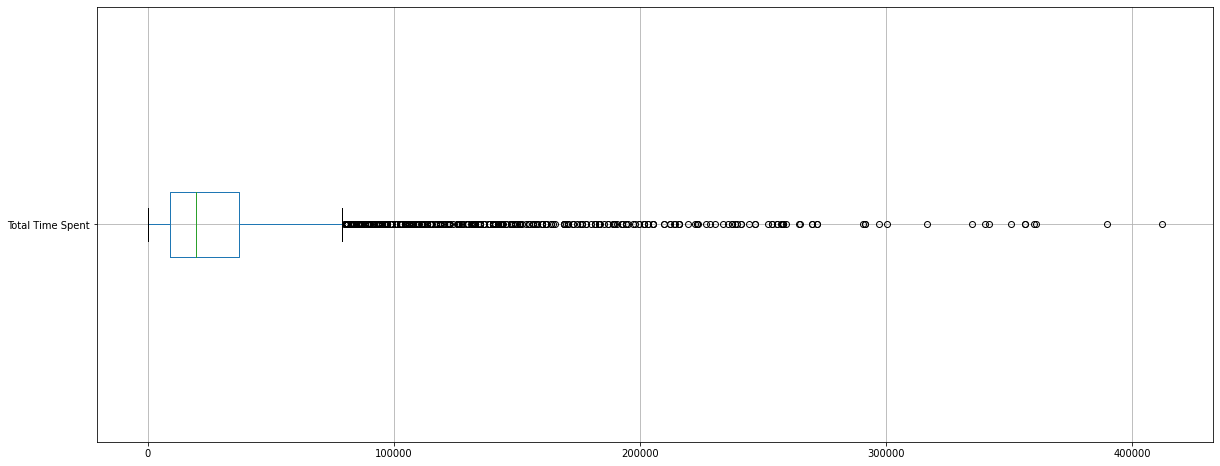

In [67]:
# boxplot for network_stay
df.boxplot(column=['Total Time Spent'],vert = False, figsize=(20,8))

Before Shape: (9171, 8)
After Shape: (9159, 8)


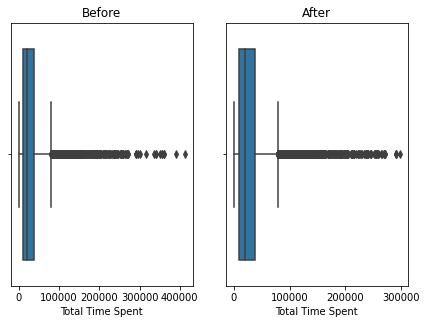

In [71]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

# DataFrame
print("Before Shape:",df.shape)

# Removing all the outliers
df2 = df[(df['Total Time Spent'] < 300000)]

#Visulization
print("After Shape:",df2.shape)

sns.boxplot(df['Total Time Spent'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Total Time Spent'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

#### Only 12 points removed by the above outlier handling using BoxPlot. So, we can continue with that operation

In [72]:
df = df2.copy()

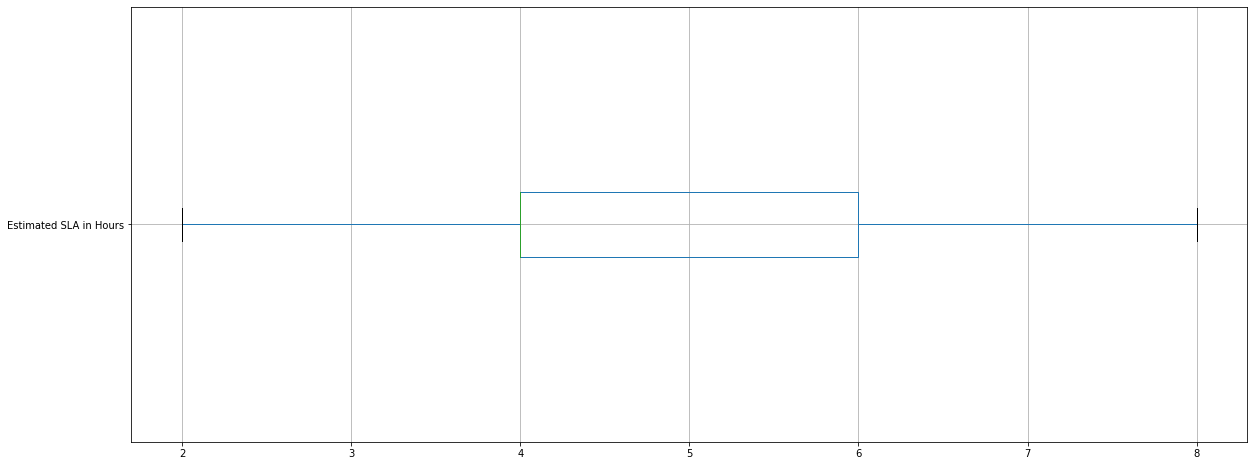

In [73]:
# boxplot for network_stay
df.boxplot(column=['Estimated SLA in Hours'],vert = False, figsize=(20,8))

#### It seems no outliers for Estimated SLA in Hours

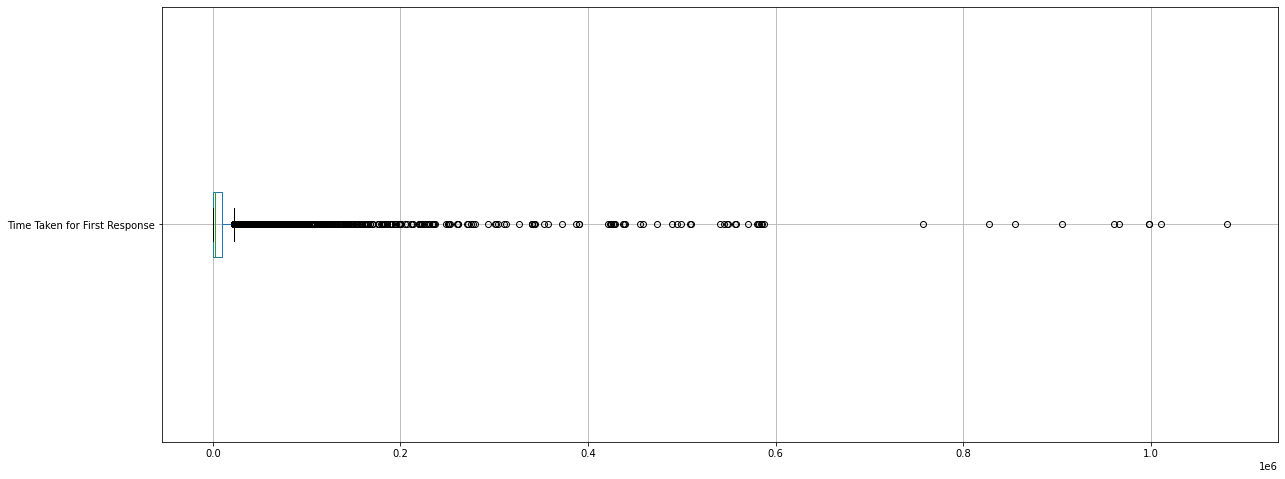

In [74]:
# boxplot for network_stay
df.boxplot(column=['Time Taken for First Response'],vert = False, figsize=(20,8))

Before Shape: (9159, 8)
After Shape: (9149, 8)


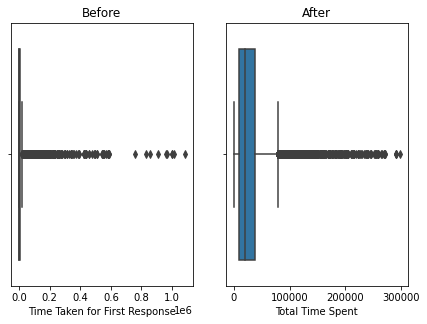

In [75]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

# DataFrame
print("Before Shape:",df.shape)

# Removing all the outliers
df2 = df[(df['Time Taken for First Response'] < 0.6 * (10**6))]

#Visulization
print("After Shape:",df2.shape)

sns.boxplot(df['Time Taken for First Response'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Total Time Spent'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

#### Only 10 points removed by the above outlier handling using BoxPlot. So, we can continue with that operation

In [76]:
df = df2.copy()

#### Outlier Handling completed

## Feature Transformation

### Plot histrograms and Q-Q Plots to see the distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d2afcdd0>,
      dtype=object)

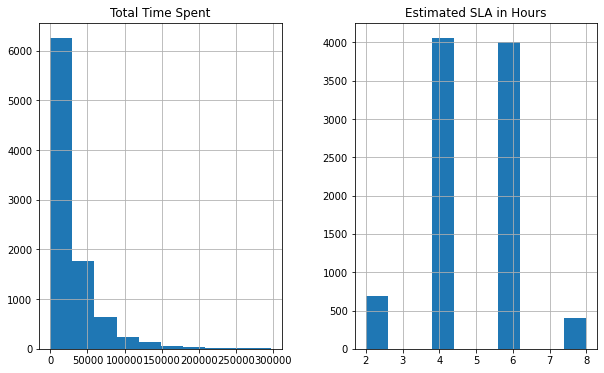

In [77]:
df[numerical_cols].hist(figsize=(10,6))

In [78]:
# check Estimated SLA in Hours unique values
list(df['Estimated SLA in Hours'].unique())

[6.0, 4.0, 8.0, 2.0]

#### Estimated SLA in Hours is discrete featue which only contains four values

#### Total Time Spent is right skewness. 

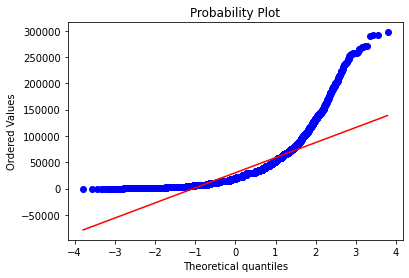

In [79]:
# plot Q-Q plot for age
import scipy.stats as stats
stats.probplot(df['Total Time Spent'], dist="norm", plot=plt)
plt.show()

#### Apply sqrt transformation to reduce the skewness
#### Functionn- sqrt

In [80]:
from sklearn.preprocessing import FunctionTransformer

# Define required columns for logarithm transformation
columns = ['Total Time Spent']

# Init log transformer with logarithm transformation 
# Natural logarithm function with plus 1 - log(1 + x)
log = FunctionTransformer(np.sqrt)

# Apply the transformation for train data
tansformed_df = log.transform(df[columns])

# Re-init dataframe by new values
df_new = pd.DataFrame(tansformed_df, columns=columns)

#### Check effect of transformation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d28f8210>]],
      dtype=object)

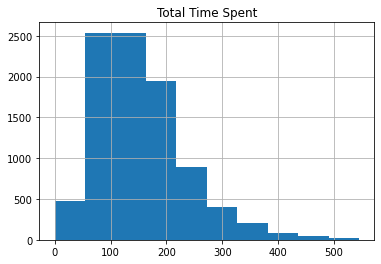

In [81]:
df_new.hist()

In [82]:
# Replace df data with new values
df[columns] = df_new[columns]

#### Sqrt transformation reduced the skewness
#### Again apply and check whether skewness can be reduced further

In [83]:
# Define required columns for logarithm transformation
columns = ['Total Time Spent']

# Init log transformer with logarithm transformation 
# Natural logarithm function with plus 1 - log(1 + x)
log = FunctionTransformer(np.sqrt)

# Apply the transformation for train data
tansformed_df = log.transform(df[columns])

# Re-init dataframe by new values
df_new = pd.DataFrame(tansformed_df, columns=columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d154ce10>]],
      dtype=object)

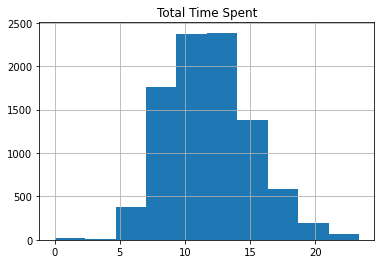

In [84]:
df_new.hist()

In [85]:
# Replace df data with new values
df[columns] = df_new[columns]

#### Now, it is well distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d15bc1d0>,
      dtype=object)

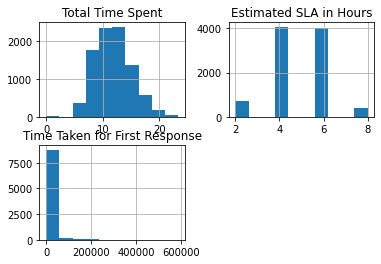

In [86]:
#### Verify Distribution again

df.hist()

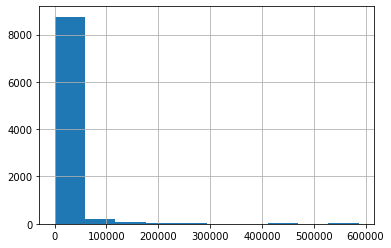

In [87]:
df['Time Taken for First Response'].hist()

### Time Taken for First Response is right skewness

In [88]:
# Define required columns for logarithm transformation
columns = ['Time Taken for First Response']

# Init log transformer with logarithm transformation 
# Natural logarithm function with plus 1 - log(1 + x)
log = FunctionTransformer(np.sqrt)

# Apply the transformation for train data
tansformed_df = log.transform(df[columns])

# Re-init dataframe by new values
df_new = pd.DataFrame(tansformed_df, columns=columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9e002d2d0>]],
      dtype=object)

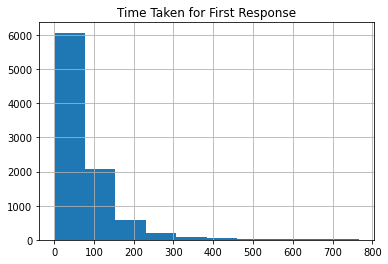

In [89]:
df_new.hist()

In [90]:
# Replace df data with new values
df[columns] = df_new[columns]

### Check again by applying sqrt transformation

In [91]:
# Define required columns for logarithm transformation
columns = ['Time Taken for First Response']

# Init log transformer with logarithm transformation 
# Natural logarithm function with plus 1 - log(1 + x)
log = FunctionTransformer(np.sqrt)

# Apply the transformation for train data
tansformed_df = log.transform(df[columns])

# Re-init dataframe by new values
df_new = pd.DataFrame(tansformed_df, columns=columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d2d84cd0>]],
      dtype=object)

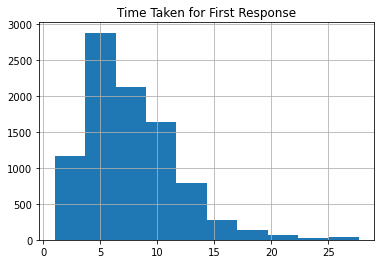

In [92]:
df_new.hist()

In [93]:
# Replace df data with new values
df[columns] = df_new[columns]

### Check again by applying sqrt transformation


In [94]:
# Define required columns for logarithm transformation
columns = ['Time Taken for First Response']

# Init log transformer with logarithm transformation 
# Natural logarithm function with plus 1 - log(1 + x)
log = FunctionTransformer(np.sqrt)

# Apply the transformation for train data
tansformed_df = log.transform(df[columns])

# Re-init dataframe by new values
df_new = pd.DataFrame(tansformed_df, columns=columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d1490590>]],
      dtype=object)

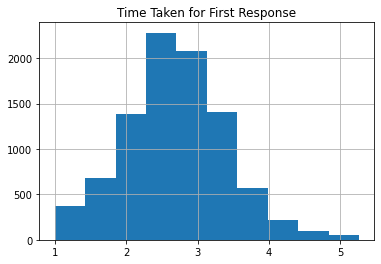

In [95]:
df_new.hist()

In [96]:
# Replace df data with new values
df[columns] = df_new[columns]

### Now, it is well distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d141af10>,
      dtype=object)

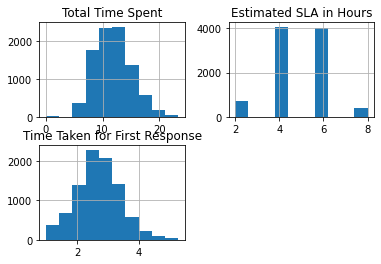

In [97]:
df.hist()

### Feature Transformations Completed

## Label Coding

#### Here, i used label coding since, the target is categorical and the domain is classification it does not create order of label 

In [98]:
df.head()

,Priority,Status,Resolution,Total Time Spent,Issue Category and Classification,Estimated SLA in Hours,Client Satisfaction,Time Taken for First Response
0,Medium,Closed,Fixed,7.745967,N/A,6.0,Satsfied,1.333521
1,Medium,Closed,Fixed,9.573480,N/A,6.0,Satsfied,2.696242
2,Critical,Closed,Fixed,17.975258,Defect - Coding error,4.0,Not Satisfied,4.064773
3,Medium,Closed,Fixed,6.513556,N/A,6.0,Satsfied,1.402851
4,Medium,Closed,Cannot Reproduce,10.954451,N/A,6.0,Satsfied,2.227456


In [99]:
priority_codes = dict()
index = 0
for topic in list(df['Priority'].unique()):
    priority_codes[topic] = index
    index += 1

priority_codes

{'Blocker': 3, 'Critical': 1, 'Low': 2, 'Medium': 0}

In [100]:
status_codes = dict()
index = 0
for topic in list(df['Status'].unique()):
    status_codes[topic] = index
    index += 1

status_codes

{'Closed': 0,
 'In Progress': 5,
 'On Hold': 4,
 'Open': 2,
 'Reopened': 6,
 'Resolved': 3,
 'Verified': 1}

In [101]:
resolution_codes = dict()
index = 0
for topic in list(df['Resolution'].unique()):
    resolution_codes[topic] = index
    index += 1

resolution_codes

{'Await 3rd Party Feedback': 11,
 'Await Client Feedback': 6,
 'Cannot Reproduce': 1,
 'Done': 2,
 'Duplicate': 7,
 'Fixed': 0,
 'Incomplete': 13,
 'Invalid': 4,
 'Later': 9,
 'N/A': 3,
 'Responded': 5,
 "Won't Do": 12,
 "Won't Fix": 8,
 'Works for Me': 10}

In [102]:
issue_codes = dict()
index = 0
for topic in list(df['Issue Category and Classification'].unique()):
    issue_codes[topic] = index
    index += 1

issue_codes

{'Connectivity_Issue': 23,
 'Connectivity_Issue - Infrastructure Issue': 25,
 'Connectivity_Issue - Third party Issue': 19,
 'Data_Correction': 20,
 'Data_Correction - Not an error': 11,
 'Defect': 2,
 'Defect - Coding error': 1,
 'Defect - Incorrect Requirement': 26,
 'Defect - Incorrect design': 5,
 'Defect - Misunderstood design': 16,
 'Defect - Misunderstood requirement': 15,
 'Defect - Omitted Requirement': 21,
 'Defect - Performance Issue': 24,
 'Enhancement': 8,
 'Enhancement - Enhancement': 9,
 'Explanation': 7,
 'Explanation - Incomplete': 17,
 'Explanation - Incorrect workflow': 22,
 'Explanation - Lack of understanding': 18,
 'Explanation - Not a defect': 4,
 'Explanation - Unable to Re-create': 13,
 'Invalid': 10,
 'Invalid - Not an error': 3,
 'N/A': 0,
 'Setup_Issue': 14,
 'Setup_Issue - Config error': 6,
 'Setup_Issue - Data setup': 12}

In [103]:
client_satis_codes = dict()
index = 0
for topic in list(df['Client Satisfaction'].unique()):
    client_satis_codes[topic] = index
    index += 1

client_satis_codes

{'Not Satisfied': 1, 'Satsfied': 0}

In [104]:
#### Encoding

df.replace({'Priority' : priority_codes,'Status' : status_codes,'Resolution' : resolution_codes, 'Issue Category and Classification' : issue_codes, 'Client Satisfaction'  : client_satis_codes}, inplace=True)

In [105]:
df.head()

,Priority,Status,Resolution,Total Time Spent,Issue Category and Classification,Estimated SLA in Hours,Client Satisfaction,Time Taken for First Response
0,0,0,0,7.745967,0,6.0,0,1.333521
1,0,0,0,9.573480,0,6.0,0,2.696242
2,1,0,0,17.975258,1,4.0,1,4.064773
3,0,0,0,6.513556,0,6.0,0,1.402851
4,0,0,1,10.954451,0,6.0,0,2.227456


### Next step is feature scaling. Before that, it is better to split the dataset to avoid and ensure data leak from train to test

## Split the Dataset

In [106]:
df.columns

Index(['Priority', 'Status', 'Resolution', 'Total Time Spent',
       'Issue Category and Classification', 'Estimated SLA in Hours',
       'Client Satisfaction', 'Time Taken for First Response'],
      dtype='object')

In [107]:
# define features as X and target as y

X = df.drop('Client Satisfaction',axis=1)
y = pd.DataFrame(df['Client Satisfaction'],columns = ['Client Satisfaction'])

In [108]:
from sklearn.model_selection import train_test_split

# spliting dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

# reset indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.head(5)

,Priority,Status,Resolution,Total Time Spent,Issue Category and Classification,Estimated SLA in Hours,Time Taken for First Response
0,0,0,5,9.211559,0,6.0,2.288755
1,1,0,2,13.774493,0,4.0,3.077974
2,3,0,0,14.416868,0,2.0,2.172377
3,3,0,0,10.954451,0,2.0,1.502698
4,0,0,0,9.211559,0,6.0,1.929357


In [109]:
y_train.head()

,Client Satisfaction
0,0
1,1
2,1
3,1
4,0


In [110]:
print(f'X_train shape = {X_train.shape}, y_train shape = {y_train.shape}, X_test shape = {X_test.shape}, y_test shape = {y_test.shape}')

X_train shape = (7319, 7), y_train shape = (7319, 1), X_test shape = (1830, 7), y_test shape = (1830, 1)


## Feature Scaling (Sandard Scaler)

In [111]:
from sklearn.preprocessing import StandardScaler

# Removing Categorical Features before the feature scaling
columns = X_train.columns
columns_new = np.delete(columns,[0,1,2,4,5])
removed_columns = np.delete(columns,[3,6])

# Applying Standardization 
# Init StandardScaler
scaler = StandardScaler() 

#Transformation of training dataset features
X_train_except = pd.DataFrame(X_train, columns = columns_new)
scaler.fit(X_train_except)
X_train = pd.DataFrame(scaler.transform(X_train_except), columns = columns_new).join(X_train[removed_columns])

#Transformation of testing dataset features
X_test_except = pd.DataFrame(X_test, columns = columns_new)
X_test = pd.DataFrame(scaler.transform(X_test_except), columns = columns_new).join(X_test[removed_columns])

X_train.head()

,Total Time Spent,Time Taken for First Response,Priority,Status,Resolution,Issue Category and Classification,Estimated SLA in Hours
0,-0.859616,-0.570312,0,0,5,0,6.0
1,0.575612,0.546918,1,0,2,0,4.0
2,0.777665,-0.735059,3,0,0,0,2.0
3,-0.311406,-1.683067,3,0,0,0,2.0
4,-0.859616,-1.079081,0,0,0,0,6.0


### See feature scaling effect by usuing histrograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d0b247d0>,
      dtype=object)

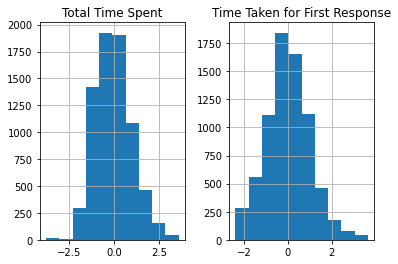

In [112]:
X_train[['Total Time Spent','Time Taken for First Response']].hist()

## Feature Engineering

                                   Total Time Spent  ...  Estimated SLA in Hours
Total Time Spent                           1.000000  ...               -0.042750
Time Taken for First Response              0.087390  ...                0.126235
Priority                                   0.036056  ...               -0.663465
Status                                     0.042465  ...               -0.026328
Resolution                                -0.059987  ...               -0.070961
Issue Category and Classification          0.002462  ...               -0.094556
Estimated SLA in Hours                    -0.042750  ...                1.000000

[7 rows x 7 columns]


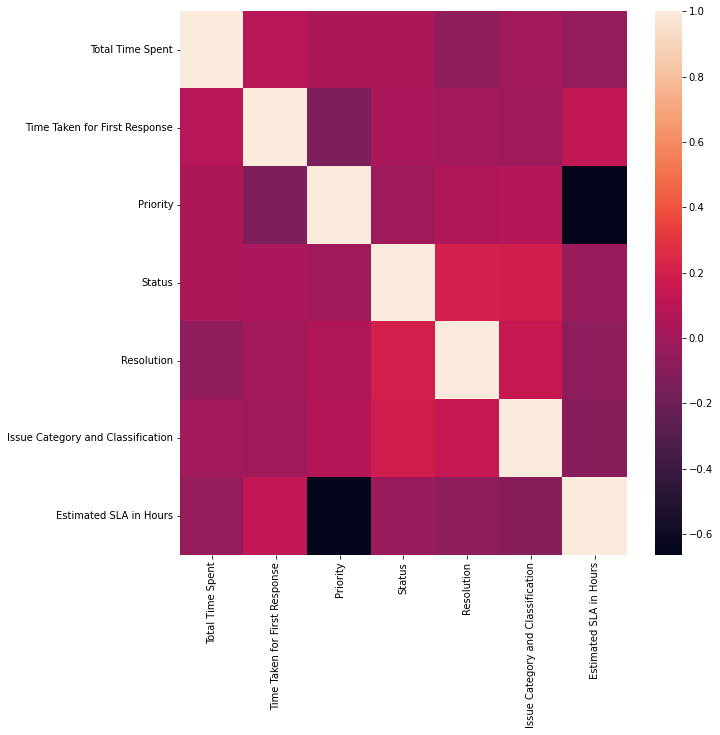

In [113]:
# plot heatmap
import seaborn as sns
print(X_train.corr());
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr());

### It seems like all feature can be assemed as independet features, Since, there are no significant correlation to moderate or higer correlation

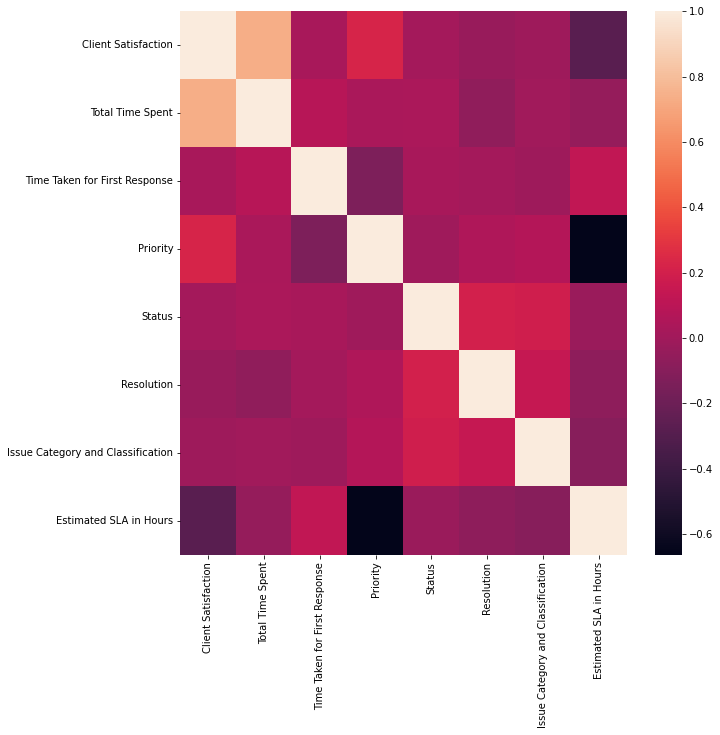

In [114]:
#test the signifncance of the continuous features
d_data = pd.concat([y_train,X_train], axis=1, join="inner")
plt.figure(figsize = (10,10))
sns.heatmap(d_data.corr()) 

In [115]:
d_data.corr()

,Client Satisfaction,Total Time Spent,Time Taken for First Response,Priority,Status,Resolution,Issue Category and Classification,Estimated SLA in Hours
Client Satisfaction,1.000000,0.736811,0.030636,0.225085,0.016167,-0.031099,-0.012751,-0.276762
Total Time Spent,0.736811,1.000000,0.087390,0.036056,0.042465,-0.059987,0.002462,-0.042750
Time Taken for First Response,0.030636,0.087390,1.000000,-0.132212,0.029968,0.016727,-0.010852,0.126235
Priority,0.225085,0.036056,-0.132212,1.000000,-0.003818,0.053894,0.072836,-0.663465
Status,0.016167,0.042465,0.029968,-0.003818,1.000000,0.205329,0.188602,-0.026328
Resolution,-0.031099,-0.059987,0.016727,0.053894,0.205329,1.000000,0.144922,-0.070961
Issue Category and Classification,-0.012751,0.002462,-0.010852,0.072836,0.188602,0.144922,1.000000,-0.094556
Estimated SLA in Hours,-0.276762,-0.042750,0.126235,-0.663465,-0.026328,-0.070961,-0.094556,1.000000


### Significant and Independent features for target
#### 1. Total Time Spent
#### 2. Priority
#### 3. Estimated SLA in Hours

In [116]:
# selected features for training

features = ['Total Time Spent','Priority','Estimated SLA in Hours']

X_train = X_train[features]
X_test = X_test[features]

In [117]:
X_train.head()

,Total Time Spent,Priority,Estimated SLA in Hours
0,-0.859616,0,6.0
1,0.575612,1,4.0
2,0.777665,3,2.0
3,-0.311406,3,2.0
4,-0.859616,0,6.0


## Model Training

In [118]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. Logistic Regression

### Cross-Validation for Hyperparameter tuning

In [119]:
lr_0 = LogisticRegression(random_state = 8)

print('Parameters currently in use:\n')
pprint(lr_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


* `C` = Inverse of regularization strength. Smaller values specify stronger regularization.
* `multi_class` = We'll choose `multinomial` because this is a multi-class problem.
* `solver` = Algorithm to use in the optimization problem. For multiclass problems, only `newton-cg`, `sag`, `saga` and `lbfgs` handle multinomial loss.
* `class_weight`: Weights associated with classes. 
* `penalty`: Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.

### Randomized Search Cross Validation

In [120]:
# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]

# multi_class
multi_class = ['multinomial']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = ['balanced', None]

# penalty
penalty = ['l2']

# Create the random grid
random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

pprint(random_grid)

{'C': [0.1,
       0.2,
       0.30000000000000004,
       0.4,
       0.5,
       0.6,
       0.7000000000000001,
       0.8,
       0.9,
       1.0],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [121]:
# First create the base model to tune
lrc = LogisticRegression(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=lrc,
                                   param_distributions=random_grid,
                                   n_iter=100,
                                   scoring='accuracy',
                                   cv=5, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   29.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=8,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'C': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0],
                                        'class_weight': ['balan

#### Note that 
##### Number of Iterations used for Randomized Search Cross Validation is 100
##### And Corss Validation folding is five

In [122]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 0.1}

The mean accuracy of a model with these hyperparameters is:
0.9972676661848363


### Grid Search Cross Validation

In [123]:
# Create the parameter grid based on the results of random search 
C = [float(x) for x in np.linspace(start = -0.2, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['newton-cg']
class_weight = ['balanced']
penalty = ['l2']

param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

# Create a base model
lrc = LogisticRegression(random_state=8)
cv_sets = ShuffleSplit(n_splits = 5, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lrc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.1s finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=...
             param_grid={'C': [-0.2, -0.06666666666666668, 0.06666666666666665,
                               0.2, 0.3333333333333333, 0.4666666666666666,
                               0.6000000000000001, 0.7333333333333334,
                               0.8666666666666667, 1.0],
         

In [124]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.06666666666666665, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}

The mean accuracy of a model with these hyperparameters is:
0.9973509933774836


In [125]:
# select best estimator
best_lrc = grid_search.best_estimator_

In [126]:
best_lrc.fit(X_train, y_train)

LogisticRegression(C=0.06666666666666665, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)

### Model Evaluation

#### Training Accuracy

In [127]:
print("The training accuracy is: ")
print(accuracy_score(y_train, best_lrc.predict(X_train)))

The training accuracy is: 
0.9979505396912146


#### Testing Accuracy

In [128]:
print("The test accuracy is: ")
print(accuracy_score(y_test, best_lrc.predict(X_test)))

The test accuracy is: 
0.9989071038251366


### Classification Report

In [129]:
print("Classification report for training")
print(classification_report(y_train,best_lrc.predict(X_train)))

Classification report for training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3084
           1       1.00      1.00      1.00      4235

    accuracy                           1.00      7319
   macro avg       1.00      1.00      1.00      7319
weighted avg       1.00      1.00      1.00      7319



In [130]:
print("Classification report for testing")
print(classification_report(y_test,best_lrc.predict(X_test)))

Classification report for testing
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       722
           1       1.00      1.00      1.00      1108

    accuracy                           1.00      1830
   macro avg       1.00      1.00      1.00      1830
weighted avg       1.00      1.00      1.00      1830



### Confusion Matrix

Confusion Matrix for Training


<Figure size 720x720 with 0 Axes>

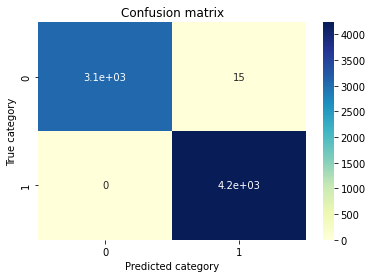

In [131]:
print('Confusion Matrix for Training')
cnf_matrix = confusion_matrix(y_train, best_lrc.predict(X_train))
plt.figure(figsize = (10,10))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()   

Confusion Matrix for Testing


<Figure size 720x720 with 0 Axes>

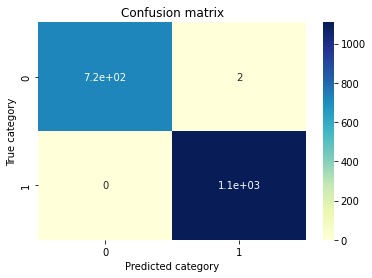

In [132]:
print('Confusion Matrix for Testing')
cnf_matrix = confusion_matrix(y_test, best_lrc.predict(X_test))
plt.figure(figsize = (10,10))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()   

In [133]:
model = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(y_train, best_lrc.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, best_lrc.predict(X_test))
}

logistic_model_accuracy = pd.DataFrame(model, index=[0])

#### Coefficients

In [134]:
best_lrc.coef_

array([[ 4.12581945,  0.307092  , -0.79477284]])

#### Intercept

In [135]:
best_lrc.intercept_

array([4.60394487])

## 2. Support Vector Machine

In [136]:
X_train.head()

,Total Time Spent,Priority,Estimated SLA in Hours
0,-0.859616,0,6.0
1,0.575612,1,4.0
2,0.777665,3,2.0
3,-0.311406,3,2.0
4,-0.859616,0,6.0


In [137]:
temp = pd.concat([X_train,y_train],axis=1)

In [138]:
temp.head()

,Total Time Spent,Priority,Estimated SLA in Hours,Client Satisfaction
0,-0.859616,0,6.0,0
1,0.575612,1,4.0,1
2,0.777665,3,2.0,1
3,-0.311406,3,2.0,1
4,-0.859616,0,6.0,0


In [139]:
client_satis_codes

{'Not Satisfied': 1, 'Satsfied': 0}

In [140]:
client_satis_codes_rev = {0 : 'Not Satisfied', 1 : 'Satsfied'}

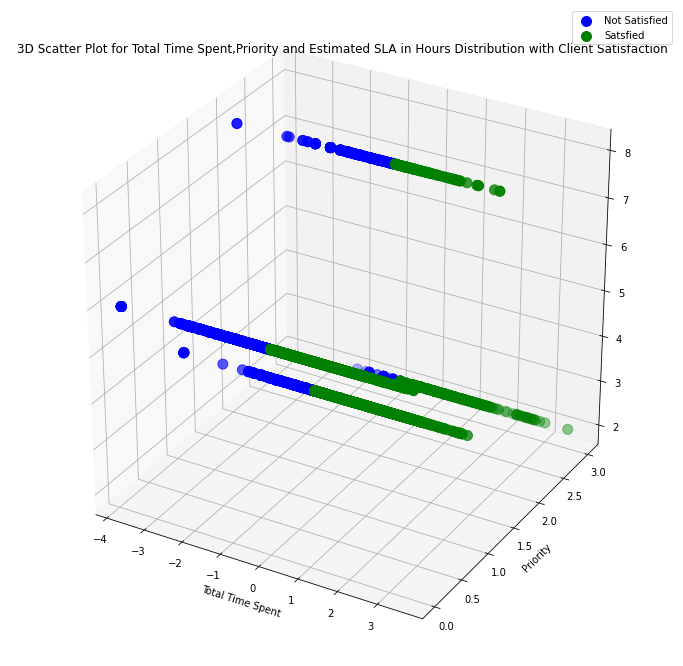

In [141]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection ="3d")

for color, label in zip('bgrm',[0,1]):
    subset = temp[temp['Client Satisfaction'] == label]
    ax.scatter3D(subset['Total Time Spent'],subset['Priority'],subset['Estimated SLA in Hours'],s=100, c = color, label = client_satis_codes_rev[label])
plt.xlabel('Total Time Spent')
plt.ylabel('Priority')
plt.title('3D Scatter Plot for Total Time Spent,Priority and Estimated SLA in Hours Distribution with Client Satisfaction')
plt.legend()

#### It seems like, client satisfaction is lineary seperable. So, we can apply linear **SVM**

### Define SVM Classifier

In [142]:
from sklearn import svm
_C = 0.1 # tune SVM regularization parameter 0.1
_gamma = 1.0 # tune gama to 1.0
svc = svm.SVC(kernel='linear', C=_C, gamma=_gamma).fit(X_train, y_train)

### Model Evaluaton

#### Training Accuracy

In [143]:
print("The training accuracy is: ")
print(accuracy_score(y_train, svc.predict(X_train)))

The training accuracy is: 
0.9894794370815685


#### Testing Accuracy

In [144]:
print("The test accuracy is: ")
print(accuracy_score(y_test, svc.predict(X_test)))

The test accuracy is: 
0.9907103825136612


#### Classfication Report

In [145]:
print("Classification report for training")
print(classification_report(y_train,svc.predict(X_train)))

Classification report for training
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3084
           1       0.98      1.00      0.99      4235

    accuracy                           0.99      7319
   macro avg       0.99      0.99      0.99      7319
weighted avg       0.99      0.99      0.99      7319



In [146]:
print("Classification report for testing")
print(classification_report(y_test,svc.predict(X_test)))

Classification report for testing
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       722
           1       0.98      1.00      0.99      1108

    accuracy                           0.99      1830
   macro avg       0.99      0.99      0.99      1830
weighted avg       0.99      0.99      0.99      1830



#### Confustion Matrix

Confusion Matrix for Training


<Figure size 720x720 with 0 Axes>

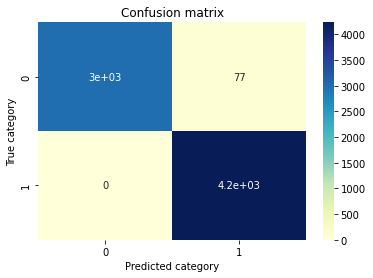

In [147]:
print('Confusion Matrix for Training')
cnf_matrix = confusion_matrix(y_train, svc.predict(X_train))
plt.figure(figsize = (10,10))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()   

Confusion Matrix for Testing


<Figure size 720x720 with 0 Axes>

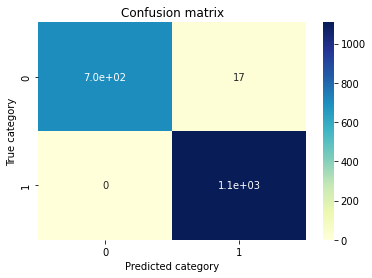

In [148]:
print('Confusion Matrix for Testing')
cnf_matrix = confusion_matrix(y_test, svc.predict(X_test))
plt.figure(figsize = (10,10))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()   

In [149]:
model = {
     'Model': 'Support Vector Machine',
     'Training Set Accuracy': accuracy_score(y_train, svc.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, svc.predict(X_test))
}

svm_model_accuracy = pd.DataFrame(model, index=[0])

## 3. Decision Tree 

In [150]:
X_train.head()

,Total Time Spent,Priority,Estimated SLA in Hours
0,-0.859616,0,6.0
1,0.575612,1,4.0
2,0.777665,3,2.0
3,-0.311406,3,2.0
4,-0.859616,0,6.0


### Define Decision Tree

#### Here, i coosed decision tree attribute selection method as entropy

In [156]:
# define tree with max depth 3  
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf = clf.fit(X_train,y_train)

### Model Evaluation

#### Training Accuracy

In [157]:
print("The training accuracy is: ")
print(accuracy_score(y_train, clf.predict(X_train)))

The training accuracy is: 
1.0


#### Testing Accuracy

In [158]:
print("The testing accuracy is: ")
print(accuracy_score(y_test, clf.predict(X_test)))

The testing accuracy is: 
0.9994535519125683


#### Classification Report

In [159]:
print("Classification report for training")
print(classification_report(y_train,clf.predict(X_train)))

Classification report for training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3084
           1       1.00      1.00      1.00      4235

    accuracy                           1.00      7319
   macro avg       1.00      1.00      1.00      7319
weighted avg       1.00      1.00      1.00      7319



In [160]:
print("Classification report for testing")
print(classification_report(y_test,clf.predict(X_test)))

Classification report for testing
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       722
           1       1.00      1.00      1.00      1108

    accuracy                           1.00      1830
   macro avg       1.00      1.00      1.00      1830
weighted avg       1.00      1.00      1.00      1830



### Confusion Matrix

Confusion Matrix for Training


<Figure size 720x720 with 0 Axes>

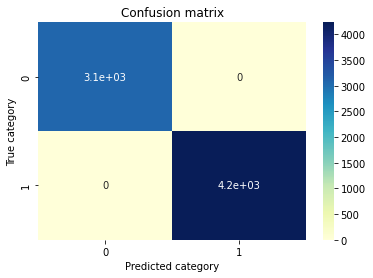

In [161]:
print('Confusion Matrix for Training')
cnf_matrix = confusion_matrix(y_train, clf.predict(X_train))
plt.figure(figsize = (10,10))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()   

Confusion Matrix for Testing


<Figure size 720x720 with 0 Axes>

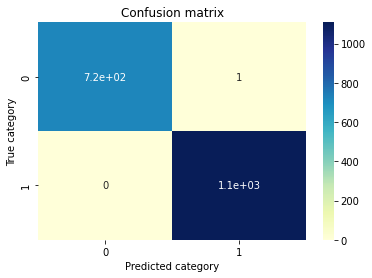

In [162]:
print('Confusion Matrix for Testing')
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
plt.figure(figsize = (10,10))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()   

### Visualizing Decision Tree

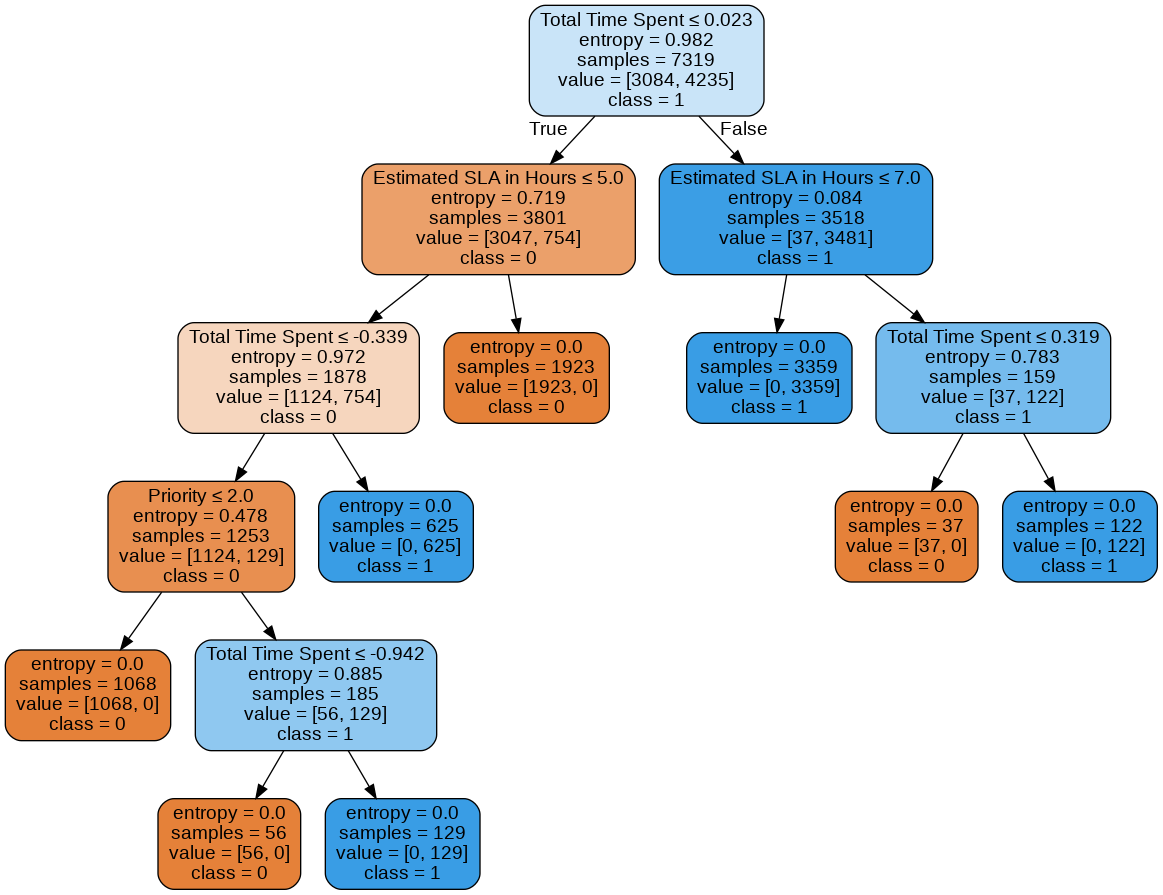

In [163]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [164]:
model = {
     'Model': 'Decision Tree Classifier',
     'Training Set Accuracy': accuracy_score(y_train, clf.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, clf.predict(X_test))
}

clf_model_accuracy = pd.DataFrame(model, index=[0])

## Model Summary

In [165]:
df_summary = pd.DataFrame()
df_summary = df_summary.append(logistic_model_accuracy)
df_summary = df_summary.append(svm_model_accuracy)
df_summary = df_summary.append(clf_model_accuracy)

In [ ]:
df_summary

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.995646,0.997639
0,Support Vector Machine,0.987454,0.990850
0,Decision Tree Classifier,1.000000,1.000000


In [166]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBRegressor,XGBClassifier

In [167]:
gradcl = GradientBoostingClassifier()
gradcl.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Confusion Matrix for Training


<Figure size 720x720 with 0 Axes>

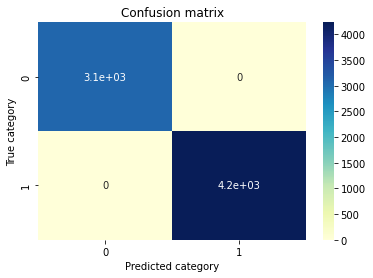

In [168]:
print('Confusion Matrix for Training')
cnf_matrix = confusion_matrix(y_train, gradcl.predict(X_train))
plt.figure(figsize = (10,10))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()   

Confusion Matrix for Training


<Figure size 720x720 with 0 Axes>

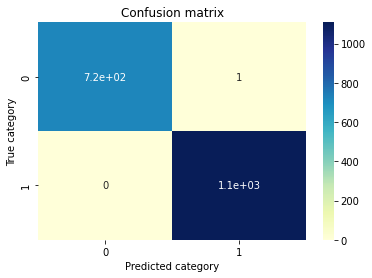

In [169]:
print('Confusion Matrix for Training')
cnf_matrix = confusion_matrix(y_test, gradcl.predict(X_test))
plt.figure(figsize = (10,10))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True,cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()   